# Plotting the Grow Dataset

## Task


You are provided with:
- The Grow dataset Growlocations.csv. This file contains the locations of all the GROWsensors as Latitude and Longitude
- A map of the UK from Openstreet map.

You should create a Python program that can read the dataset into a dataframe and plot the locations of the sensors on the map provided. You can use online tutorials to do this (but mention them in comments section of your code). However there are a number of errors with the dataset that you will need to fix in order to get the correct plot.

These include:
- Some location values are way outside the allowed values for latitude and Longitude.
- Some locations are not on the map provided.
- The labels of the columns have not be verified so may be incorrect.

The bounding box for the map is as follows:
- Longitude Min -10.592
- Longitude Max 1.6848
- Latitude Min 50.681
- Latitude Max 57.985

Marks will be allocated as follows:
- Reading the data into a data frame. 25%
- Removing bad values. . 25%
- Fixing other problems. . 25%
- Plotting the data correctly. . 25%

An example map is on the next page. Note, I do not expect you to get the sensors in the absolute correct locations, but the locations should match approximately the ones on the map below.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data into a data frame

In [2]:
grow_locations_df = pd.read_csv("GrowLocations.csv")
grow_locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39294 entries, 0 to 39293
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Serial      39252 non-null  object 
 1   Latitude    39294 non-null  float64
 2   Longitude   39294 non-null  float64
 3   Type        39294 non-null  object 
 4   SensorType  39294 non-null  object 
 5   Code        39294 non-null  object 
 6   BeginTime   39294 non-null  object 
 7   EndTime     39294 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.4+ MB


In [3]:
grow_locations_df.head()

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


In [4]:
# Number of serial numbers
grow_locations_df['Serial'].nunique()

6310

## Identifying potential issues

From the assignment we know the geographical location that we are looking at.

The bounding box for the map is as follows:
- Longitude Min -10.592 
- Longitude Max 1.6848 
- Latitude Min 50.681 
- Latitude Max 57.98

Also, to be valid, latitudes should be between + and - 90, and longditudes +- 180.

In [5]:
# Look at the most extreme values for latitude for potential problems

grow_locations_df.sort_values('Latitude')

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
38880,PI040298AD5I209078,-18.144,27.754,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_j3wnhkx4,2019-09-11T07:55:27.000Z,2019-09-20T09:10:27.000Z
38708,PI040298AD5G203374,-18.144,27.754,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_9h1fyfnq,2019-09-11T06:47:05.000Z,2019-09-20T09:17:05.000Z
38709,PI040298AD5G203374,-18.144,27.754,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_9h1fyfnq,2019-09-11T06:47:05.000Z,2019-09-20T09:17:05.000Z
38710,PI040298AD5G203374,-18.144,27.754,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_9h1fyfnq,2019-09-11T06:47:05.000Z,2019-09-20T09:17:05.000Z
38885,PI040298AD5I209078,-18.144,27.754,Thingful.Connectors.GROWSensors.WaterTankLevel,Flower Power,Grow.Thingful.Sensors_j3wnhkx4,2019-09-11T07:55:27.000Z,2019-09-20T09:10:27.000Z
...,...,...,...,...,...,...,...,...
37761,"PI040307AA4A016608. FuturePractice:,Id:1192,La...",465958.000,360431.000,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_fbrmxjh3,2019-10-10T12:05:26.000Z,2019-10-28T14:35:48.000Z
37762,"PI040307AA4A016608. FuturePractice:,Id:1192,La...",465958.000,360431.000,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_fbrmxjh3,2019-10-10T12:05:26.000Z,2019-10-28T14:35:48.000Z
37758,"PI040307AA4A016608. FuturePractice:,Id:1192,La...",465958.000,360431.000,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_fbrmxjh3,2019-10-10T12:05:26.000Z,2019-10-28T14:35:48.000Z
37759,"PI040307AA4A016608. FuturePractice:,Id:1192,La...",465958.000,360431.000,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_fbrmxjh3,2019-10-10T12:05:26.000Z,2019-10-28T14:35:48.000Z


The low values for latitude here are valid, but far away from the region to be plotted, and can be filtered out, as they are probably just from a different place.

However, the highest values here are clearly a mistake, and there is some nested data in the serial column that might give a clue.

In [6]:
# Unfortunately the data is not in here
print(grow_locations_df.loc[37763, 'Serial'])
print(grow_locations_df.loc[37759, 'Serial'])

PI040307AA4A016608. FuturePractice:,Id:1192,LandCoverOverlay:,LandCoverTypes:,LandManagement:,LandUseArea:,LandUseSpot:,Latitude:,Longitude:,ParcelSize:,Photos:,SensorId:Stc,_rde_field opp house,SensorMissionManagement:,SensorOnMulchedGround:,SensorOvergrown:,SensorShadedByTrees:,SlopeAspect:,SlopePosition:,SoilTextureClay:,SoilTextureSand:,SoilTextureSilt:,StoneContent:,SubmissionTimestamp:2019-10-20T12:52:43.906027+00:
PI040307AA4A016608. FuturePractice:,Id:1192,LandCoverOverlay:,LandCoverTypes:,LandManagement:,LandUseArea:,LandUseSpot:,Latitude:,Longitude:,ParcelSize:,Photos:,SensorId:Stc,_rde_field opp house,SensorMissionManagement:,SensorOnMulchedGround:,SensorOvergrown:,SensorShadedByTrees:,SlopeAspect:,SlopePosition:,SoilTextureClay:,SoilTextureSand:,SoilTextureSilt:,StoneContent:,SubmissionTimestamp:2019-10-20T12:52:43.906027+00:


In [7]:
# I want to how many of the sensors have invalid latitude and/or longitude
valid_lat = grow_locations_df['Latitude'].between(-90, 90, inclusive='both')
valid_long = grow_locations_df['Longitude'].between(-180, 180, inclusive='both')
grow_locations_df[~(valid_lat & valid_long)]['Serial'].nunique()

9

In [8]:
# It's not so many, so I can take a look at them all at once
grow_locations_df[~(valid_lat & valid_long)][['Serial', 'Latitude', 'Longitude']].drop_duplicates()

,Serial,Latitude,Longitude
23652,PI040298AA4C055243,2.0,4903185.0
37746,"PI040307AA4C019989. FuturePractice:,Id:1196,La...",465652.0,360502.0
37752,PI040307AA4A016667,465652.0,360472.0
37758,"PI040307AA4A016608. FuturePractice:,Id:1192,La...",465958.0,360431.0
37950,PI040307AA4C020377,465943.0,360373.0
37956,PI040307AA4A016727,465883.0,360323.0
37962,"PI040307AA4A016520. FuturePractice:,Id:1194,La...",465662.0,360213.0
37968,"PI040307AA4C019855. FuturePractice:,Id:432,Lan...",465643.0,360206.0
37974,"PI040307AA4C020026. FuturePractice:,Id:431,Lan...",465632.0,360196.0


In [9]:
print(grow_locations_df[~(valid_lat & valid_long)][['Serial', 'Latitude', 'Longitude']].drop_duplicates()['Serial'].values)

['PI040298AA4C055243'
 'PI040307AA4C019989. FuturePractice:,Id:1196,LandCoverOverlay:,LandCoverTypes:,LandManagement:,LandUseArea:,LandUseSpot:,Latitude:,Longitude:,ParcelSize:,Photos:,SensorId:Stc_rde_oak Below Anthony MWoo,SensorMissionManagement:,SensorOnMulchedGround:,SensorOvergrown:,SensorShadedByTrees:,SlopeAspect:,SlopePosition:,SoilTextureClay:,SoilTextureSand:,SoilTextureSilt:,StoneContent:,SubmissionTimestamp:2019-10-20T13:08:15.052917+00:'
 'PI040307AA4A016667'
 'PI040307AA4A016608. FuturePractice:,Id:1192,LandCoverOverlay:,LandCoverTypes:,LandManagement:,LandUseArea:,LandUseSpot:,Latitude:,Longitude:,ParcelSize:,Photos:,SensorId:Stc,_rde_field opp house,SensorMissionManagement:,SensorOnMulchedGround:,SensorOvergrown:,SensorShadedByTrees:,SlopeAspect:,SlopePosition:,SoilTextureClay:,SoilTextureSand:,SoilTextureSilt:,StoneContent:,SubmissionTimestamp:2019-10-20T12:52:43.906027+00:'
 'PI040307AA4C020377' 'PI040307AA4A016727'
 'PI040307AA4A016520. FuturePractice:,Id:1194,LandC

In [10]:
# Some of these do have valid lat and long values buried in their serial columns that could be extracted

In [11]:
grow_locations_df['Serial'].str.extract(pat='Latitude:(.*?),Longitude:(.*?),').dropna()

,0,1
54,47.309803,18.4156017
55,47.309803,18.4156017
56,47.309803,18.4156017
57,47.309803,18.4156017
58,47.309803,18.4156017
...,...,...
39181,50.88384,15.5616245
39182,50.88384,15.5616245
39183,50.88384,15.5616245
39184,50.88384,15.5616245


In [12]:
# I also want to check if all lines that have the same serial number have the same lat and long
duplicated = grow_locations_df[['Serial', 'Latitude', 'Longitude']].drop_duplicates().groupby('Serial').nunique()
duplicated[(duplicated['Latitude'] > 1) | (duplicated['Longitude'] > 1)]

,Latitude,Longitude
Serial,,
PI040297AA3I001108,2,2
"PI040297AA3I001108. FuturePractice:,Id:399,LandCoverOverlay:,LandCoverTypes:[Additional:[Other broad leaved and coniferous trees],Cover:> 91%,Id:4054,Name:Trees,Additional:[],Cover:51-75%,Id:4057,Name:Other ground covering plants (weeds, grasses)],LandManagement:,LandUseArea:Cultivated, agricultural land,LandUseSpot:Field or grazing pasture,Latitude:48.0040665,Longitude:19.8132153,ParcelSize:0.01 0.5 ha,Photos:,SensorId:MIS_VK_3E45,SensorMissionManagement:false,SensorOnMulchedGround:false,SensorOvergrown:false,SensorShadedByTrees:true,SlopeAspect:DNY,SlopePosition:Shoulder,SoilTextureClay:,SoilTextureSand:,SoilTextureSilt:,StoneContent:,SubmissionTimestamp:2018-10-31T15:02:06.762427+00:",2,2
PI040297AA3J003673,2,1
PI040297AA3L024781,2,2
PI040297AD5I205735,2,2
...,...,...
PI040307AD5I203792,2,2
PI040307AD5I203906,2,2
PI040307AD5I204104,2,2


In [13]:
# This example looks like the sensor has either moved slightly or has been entered slightly differently
grow_locations_df[grow_locations_df['Serial']=='PI040297AA3I001108']

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
564,PI040297AA3I001108,19.813,48.004,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_mnz0tndr,2018-10-31T14:38:01.000Z,2018-10-31T15:23:01.000Z
565,PI040297AA3I001108,19.813,48.004,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_mnz0tndr,2018-10-31T14:38:01.000Z,2018-10-31T15:23:01.000Z
566,PI040297AA3I001108,19.813,48.004,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_mnz0tndr,2018-10-31T14:38:01.000Z,2018-10-31T15:23:01.000Z
567,PI040297AA3I001108,19.813,48.004,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_mnz0tndr,2018-10-31T14:38:01.000Z,2018-10-31T15:23:01.000Z
568,PI040297AA3I001108,19.813,48.004,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_mnz0tndr,2018-10-31T14:38:01.000Z,2018-10-31T15:23:01.000Z
569,PI040297AA3I001108,19.813,48.004,Thingful.Connectors.GROWSensors.WaterTankLevel,Flower Power,Grow.Thingful.Sensors_mnz0tndr,2018-10-31T14:38:01.000Z,2018-10-31T15:23:01.000Z
1026,PI040297AA3I001108,19.817,48.015,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_vscm8nca,2018-11-02T12:37:13.000Z,2018-11-12T12:22:13.000Z
1027,PI040297AA3I001108,19.817,48.015,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_vscm8nca,2018-11-02T12:37:13.000Z,2018-11-12T12:22:13.000Z
1028,PI040297AA3I001108,19.817,48.015,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_vscm8nca,2018-11-02T12:37:13.000Z,2018-11-12T12:22:13.000Z
1029,PI040297AA3I001108,19.817,48.015,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_vscm8nca,2018-11-02T12:37:13.000Z,2018-11-12T12:22:13.000Z


In [14]:
# Some rows are 0,0 lat,long
min_max = grow_locations_df.groupby('Serial').agg({'Latitude': ['min', 'max'], 'Longitude': ['min', 'max']})
min_max['lat_diff'] = min_max['Latitude', 'max'] - min_max['Latitude', 'min']
min_max['long_diff'] = min_max['Longitude', 'max'] - min_max['Longitude', 'min']
min_max.sort_values('lat_diff', ascending=False).head(20)

Latitude         Longitude         lat_diff long_diff
                        min     max       min     max                   
Serial                                                                  
PI040307AD5G202249      0.0  21.316       0.0  48.165   21.316    48.165
PI040307AD5G200425      0.0  21.315       0.0  48.168   21.315    48.168
PI040307AD5G200335      0.0  21.302       0.0  48.169   21.302    48.169
PI040298AD5G204879      0.0  21.301       0.0  48.166   21.301    48.166
PI040298AD5I208522      0.0  21.299       0.0  48.168   21.299    48.168
PI040307AD5I203792      0.0  21.298       0.0  48.169   21.298    48.169
PI040298AA3J019994      0.0  21.039       0.0  48.364   21.039    48.364
PI040297AD5J210378      0.0  20.768       0.0  48.104   20.768    48.104
PI040297AD5I209992      0.0  20.768       0.0  48.104   20.768    48.104
PI040298AA3I004792      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3I003514      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA4A043084      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3J012441      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3J020848      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3I001081      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3J009751      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3L037484      0.0  20.765       0.0  48.082   20.765    48.082
PI040298AA3I000856      0.0  20.764       0.0  48.082   20.764    48.082
PI040298AA3I001504      0.0  20.764       0.0  48.082   20.764    48.082
PI040298AA3I001582      0.0  20.764       0.0  48.082   20.764    48.082

## Cleanup

In [15]:
# Get the more accurate latitude and longitudes
grow_locations_with_extra_latlong = pd.concat([grow_locations_df, grow_locations_df['Serial'].str.extract(pat='Latitude:(.*?),Longitude:(.*?),')], axis=1)
grow_locations_with_extra_latlong['Latitude'] = pd.to_numeric(grow_locations_with_extra_latlong[0]).fillna(grow_locations_with_extra_latlong['Latitude'])
grow_locations_with_extra_latlong['Longitude'] = pd.to_numeric(grow_locations_with_extra_latlong[1]).fillna(grow_locations_with_extra_latlong['Longitude'])
grow_locations_with_extra_latlong

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,0,1
0,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,NaN,NaN
1,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,NaN,NaN
2,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,NaN,NaN
3,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,NaN,NaN
4,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
39289,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,NaN,NaN
39290,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,NaN,NaN
39291,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,NaN,NaN
39292,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,NaN,NaN


In [16]:
grow_locations_with_extra_latlong['Serial'].nunique()

6310

In [17]:
# Remove the locations outside the uk map bounding box
uk_lat = grow_locations_with_extra_latlong['Latitude'].between(50.681, 57.985, inclusive='both')
uk_long = grow_locations_with_extra_latlong['Longitude'].between(-10.592, 1.6848, inclusive='both')
grow_locations_uk = grow_locations_with_extra_latlong[uk_lat & uk_long]
grow_locations_uk.shape

(660, 10)

In [18]:
# Deuduplicate the serial numbers taking the most recent
most_recent = grow_locations_uk.groupby('Serial')['EndTime'].transform('rank', method='first', ascending=False)
grow_locations_to_plot = grow_locations_uk[most_recent== 1]
print(grow_locations_to_plot.shape)
grow_locations_to_plot

(110, 10)


,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,0,1
132,"PI040297AD5I210109. FuturePractice:,Id:461,Lan...",56.572296,-3.233928,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_pgr59nte,2018-10-20T16:11:44.000Z,2019-05-12T19:00:16.000Z,56.5722961,-3.23392773
180,"PI040297AD5I206301. FuturePractice:,Id:721,Lan...",52.798020,-3.871406,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_0gzbnyhs,2018-10-27T12:11:54.000Z,2019-01-19T14:24:56.000Z,52.79802,-3.8714056
3960,"PI040297AD5I209213. FuturePractice:,Id:336,Lan...",51.395985,0.122108,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_dedfkptc,2018-08-14T15:05:10.000Z,2019-10-30T15:52:13.000Z,51.3959846,0.1221083
4086,"PI040297AD5I207697. FuturePractice:,Id:630,Lan...",55.902340,-4.305260,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_116wcr07,2018-08-21T08:56:31.000Z,2019-08-12T08:26:11.000Z,55.90234,-4.30526
5400,"PI040297AD5I206478. FuturePractice:,Id:406,Lan...",55.955933,-3.301378,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_mxfd4554,2018-09-07T13:43:16.000Z,2019-10-28T15:17:24.000Z,55.9559326,-3.30137753
...,...,...,...,...,...,...,...,...,...,...
34584,"PI040298AA3J007511. FuturePractice:,Id:1186,La...",52.222220,-3.981412,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_g7a079p9,2019-09-21T16:07:50.000Z,2019-10-23T15:06:17.000Z,52.22222,-3.98141217
34638,"PI040298AA3I006517. FuturePractice:,Id:1187,La...",52.150745,-4.092808,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_fn5n4tfd,2019-09-23T16:54:58.000Z,2019-10-07T17:54:23.000Z,52.1507454,-4.092808
36546,"PI040307AA4C021673. FuturePractice:,Id:721,Lan...",52.798020,-3.871406,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_03ajjw5b,2019-10-09T17:54:27.000Z,2019-10-29T18:08:52.000Z,52.79802,-3.8714056
37968,"PI040307AA4C019855. FuturePractice:,Id:432,Lan...",52.289997,-6.799615,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_ergwswmt,2019-10-10T11:09:33.000Z,2019-10-28T14:24:58.000Z,52.2899971,-6.799615


## Plot the locations

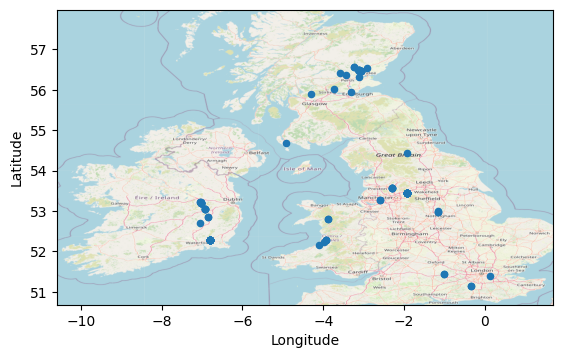

In [19]:
# reference: https://stackoverflow.com/questions/34458251/plot-over-an-image-background-in-python

%matplotlib inline
im = plt.imread("map7.png")
ax = grow_locations_to_plot.plot('Longitude', 'Latitude', xlim = (-10.592, 1.6848), ylim = (50.681, 57.985), kind='scatter')
ax.imshow(im, extent=[-10.592, 1.6848, 50.681, 57.985])

## Assessing the result

When comparing my plot to the one given in the assignment, mine looks a lot more sparse, and there were whole areas that have many sensors, such as Northern Ireland, in the example given that are not in my plot. Looking at the assignment, there's a hint that the columns might not be named correctly. That gives me the idea to see if the lattitude and longitude are swapped.

## Swapping lat and long

In [20]:
grow_locations_swapped = grow_locations_df.rename({'Longitude': 'Latitude', 'Latitude': 'Longitude'}, axis=1)
grow_locations_swapped.head()

,Serial,Longitude,Latitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


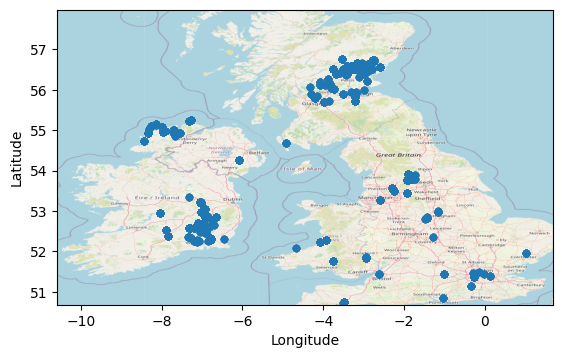

In [21]:
%matplotlib inline
im = plt.imread("map7.png")
ax = grow_locations_swapped.plot('Longitude', 'Latitude', xlim = (-10.592, 1.6848), ylim = (50.681, 57.985), kind='scatter')
ax.imshow(im, extent=[-10.592, 1.6848, 50.681, 57.985])

This plot looks very similar to the one given in the assignment. Aside from switching latitude and longitude, this data did not have any of the cleaning steps done in the "Cleanup" section. If the plot did not already look so much like the example output, I would repeat those cleaning steps with the renamed lat and long.

Any points outside of the bounding box or are unallowed values are not a problem for producing the plot, because the plot has the limits set already.

If I were to work on this problem in another context, I would ask some questions about how the data was produced to get some answers to these questions:

- Were the readings gathered as seperate files and then put into one? If so, it may be that some of the datapoints were not swapped between lat and long, so they might need to be selectively swapped.
- When the same Serial has different lat and long values, either slightly or a lot, what does that mean? Should all values be included? In this image, they are all included because it looks similar to the example output given.

## Solution Code

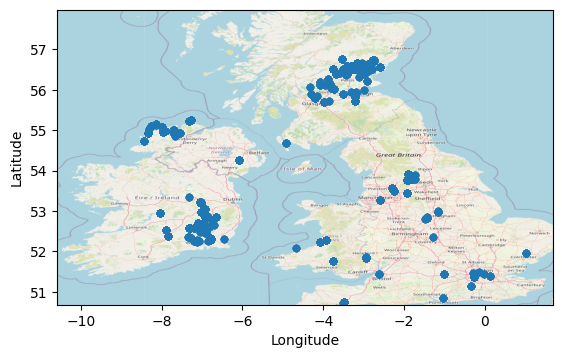

In [24]:
# Here's a recap of the end to end process

# Do imports
import pandas as pd
import matplotlib.pyplot as plt

# Load data
grow_locations_df = pd.read_csv("GrowLocations.csv")

# Swap lat and long
grow_locations_swapped = grow_locations_df.rename({'Longitude': 'Latitude', 'Latitude': 'Longitude'}, axis=1)

# Make plot
im = plt.imread("map7.png")
ax = grow_locations_swapped.plot('Longitude', 'Latitude', xlim = (-10.592, 1.6848), ylim = (50.681, 57.985), kind='scatter')
ax.imshow(im, extent=[-10.592, 1.6848, 50.681, 57.985])
plt.savefig('output.png')